### Linear Regression Task
- 각 광고 종목에 투자했을 때, 수익이 얼만큼 발생하는지 회귀 예측 진행

In [1]:
import pandas as pd

a_df = pd.read_csv('./datasets/advertising.csv')
a_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
pre_a_df = a_df.drop(labels=['Unnamed: 0'], axis=1)

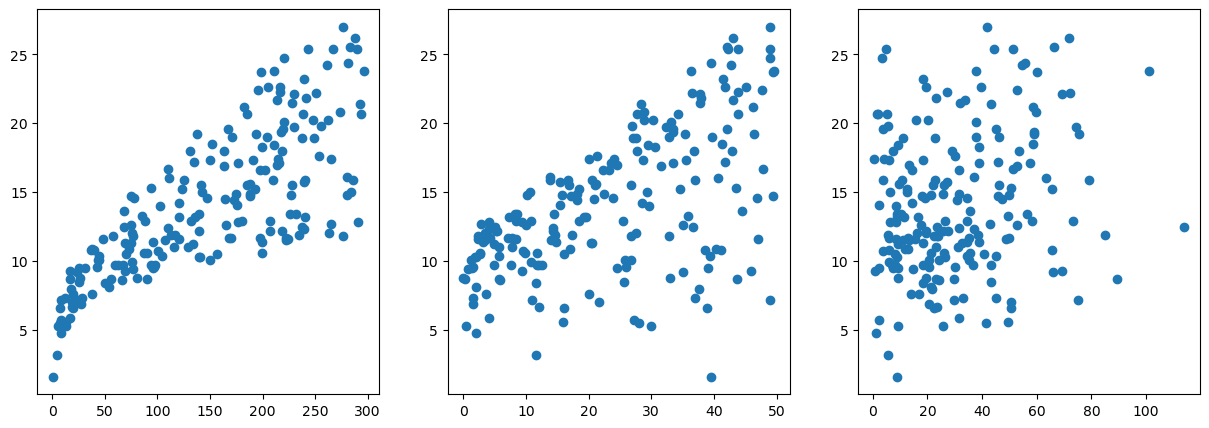

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(pre_a_df['TV'], pre_a_df['Sales'])
axes[1].scatter(pre_a_df['Radio'], pre_a_df['Sales'])
axes[2].scatter(pre_a_df['Newspaper'], pre_a_df['Sales'])
plt.show()

In [4]:
pre_a_df = pre_a_df[['TV', 'Sales']]
pre_a_df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

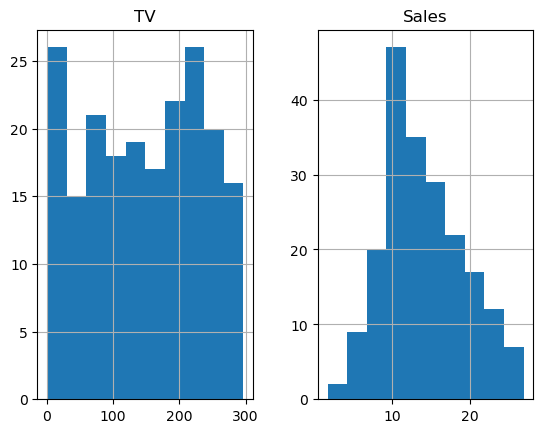

In [5]:
pre_a_df.hist()

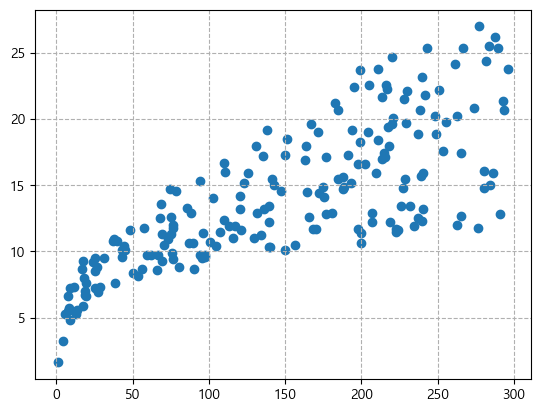

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(pre_a_df.TV, pre_a_df.Sales)
plt.grid(visible=True, linestyle='--')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
import torch
from torch.optim import SGD

torch.manual_seed(124)

features, targets = pre_a_df.TV, pre_a_df.Sales

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values).view(-1, 1)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values).view(-1, 1)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=34533e-10)

epochs = 100000

for epoch in range(1, epochs + 1):
    H = W * X_train + b
    loss = torch.mean((H - y_train) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W.item(), b.item(), loss.item()))

1000/100000: W: 0.0832, b: 0.0119, loss: 22.6895
2000/100000: W: 0.0831, b: 0.0233, loss: 22.6517
3000/100000: W: 0.0831, b: 0.0347, loss: 22.6141
4000/100000: W: 0.0830, b: 0.0460, loss: 22.5766
5000/100000: W: 0.0830, b: 0.0574, loss: 22.5392
6000/100000: W: 0.0829, b: 0.0688, loss: 22.5020
7000/100000: W: 0.0828, b: 0.0801, loss: 22.4648
8000/100000: W: 0.0828, b: 0.0914, loss: 22.4278
9000/100000: W: 0.0827, b: 0.1027, loss: 22.3909
10000/100000: W: 0.0827, b: 0.1139, loss: 22.3541
11000/100000: W: 0.0826, b: 0.1252, loss: 22.3175
12000/100000: W: 0.0826, b: 0.1364, loss: 22.2809
13000/100000: W: 0.0825, b: 0.1476, loss: 22.2445
14000/100000: W: 0.0824, b: 0.1588, loss: 22.2081
15000/100000: W: 0.0824, b: 0.1700, loss: 22.1719
16000/100000: W: 0.0823, b: 0.1812, loss: 22.1358
17000/100000: W: 0.0823, b: 0.1923, loss: 22.0999
18000/100000: W: 0.0822, b: 0.2035, loss: 22.0640
19000/100000: W: 0.0822, b: 0.2146, loss: 22.0282
20000/100000: W: 0.0821, b: 0.2257, loss: 21.9926
21000/100

In [11]:
H = 0.0779 * X_test + 1.0584
loss = torch.mean((H - y_test) ** 2)
print(loss)

tensor(19.8474)


In [13]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

features, targets = pre_a_df.TV, pre_a_df.Sales

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values).view(-1, 1)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values).view(-1, 1)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = Linear(1, 1)

optimizer = SGD(l_r.parameters(), lr=34533e-10)

epochs = 100000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))

1000/100000: W: 0.0818, b: 0.2772, loss: 21.8277
2000/100000: W: 0.0818, b: 0.2882, loss: 21.7927
3000/100000: W: 0.0817, b: 0.2992, loss: 21.7578
4000/100000: W: 0.0817, b: 0.3102, loss: 21.7230
5000/100000: W: 0.0816, b: 0.3211, loss: 21.6884
6000/100000: W: 0.0816, b: 0.3320, loss: 21.6538
7000/100000: W: 0.0815, b: 0.3429, loss: 21.6194
8000/100000: W: 0.0815, b: 0.3538, loss: 21.5850
9000/100000: W: 0.0814, b: 0.3647, loss: 21.5508
10000/100000: W: 0.0813, b: 0.3756, loss: 21.5167
11000/100000: W: 0.0813, b: 0.3864, loss: 21.4826
12000/100000: W: 0.0812, b: 0.3972, loss: 21.4487
13000/100000: W: 0.0812, b: 0.4080, loss: 21.4149
14000/100000: W: 0.0811, b: 0.4188, loss: 21.3812
15000/100000: W: 0.0811, b: 0.4296, loss: 21.3477
16000/100000: W: 0.0810, b: 0.4403, loss: 21.3142
17000/100000: W: 0.0810, b: 0.4511, loss: 21.2808
18000/100000: W: 0.0809, b: 0.4618, loss: 21.2475
19000/100000: W: 0.0809, b: 0.4725, loss: 21.2144
20000/100000: W: 0.0808, b: 0.4832, loss: 21.1813
21000/100

In [15]:
H = 0.0767 * X_test + 1.2851
loss = torch.mean((H - y_test) ** 2)
print(loss)

tensor(18.9980)


In [16]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [17]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

features, targets = pre_a_df.TV, pre_a_df.Sales

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values).view(-1, 1)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values).view(-1, 1)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel()

optimizer = SGD(l_r.parameters(), lr=34533e-10)

epochs = 100000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))

10000/100000: W: 0.0813, b: 0.3756, loss: 21.5167
20000/100000: W: 0.0808, b: 0.4832, loss: 21.1813
30000/100000: W: 0.0803, b: 0.5891, loss: 20.8565
40000/100000: W: 0.0797, b: 0.6933, loss: 20.5418
50000/100000: W: 0.0792, b: 0.7959, loss: 20.2370
60000/100000: W: 0.0787, b: 0.8969, loss: 19.9417
70000/100000: W: 0.0782, b: 0.9963, loss: 19.6556
80000/100000: W: 0.0777, b: 1.0941, loss: 19.3784
90000/100000: W: 0.0772, b: 1.1903, loss: 19.1102
100000/100000: W: 0.0767, b: 1.2851, loss: 18.8501


In [18]:
H = 0.0767 * X_test + 1.2851
loss = torch.mean((H - y_test) ** 2)
print(loss) 

tensor(18.9980)


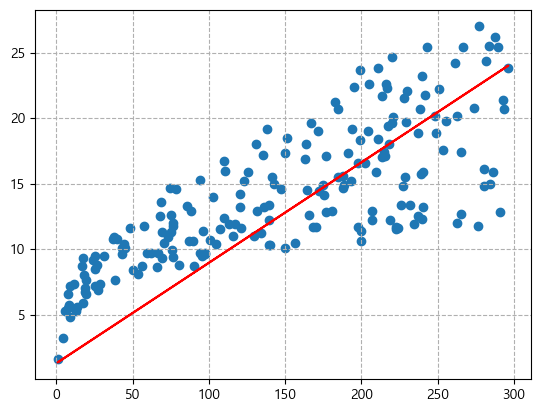

In [21]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(pre_a_df.TV, pre_a_df.Sales)
plt.plot(pre_a_df.TV, 0.0767 * pre_a_df.TV + 1.2851, color="red")
plt.grid(visible=True, linestyle='--')
plt.show()

### Sklearn - LinearRegression Task

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
print('W: {:.4f}, b: {:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W: 0.0467, b: 7.2020


In [24]:
from sklearn.metrics import mean_squared_error

prediction = l_r.predict(X_test)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'\
      .format(mean_squared_error(y_test, prediction), 
      np.sqrt(mean_squared_error(y_test, prediction))))

MSE loss: 9.4174, RMSE loss: 3.0688


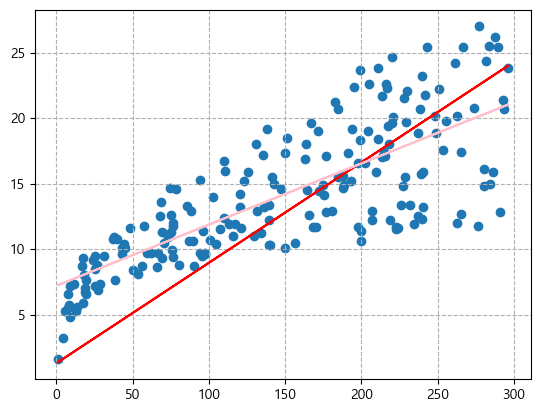

In [25]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(pre_a_df.TV, pre_a_df.Sales)
plt.plot(pre_a_df.TV, 0.0767 * pre_a_df.TV + 1.2851, color="red")
plt.plot(pre_a_df.TV, 0.0467 * pre_a_df.TV + 7.2020, color="pink")
plt.grid(visible=True, linestyle='--')
plt.show()